In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Required Functions

In [2]:

class Optimization:
    def __init__(self,slope):
        self.gradient = slope
    def batch_gradient_descent(self,X,labels,parameter,lr,tot_err = 1e-6,lam = 1):
        err = float('inf')
        while err>tot_err:
            gradient = self.gradient(X,parameter,labels,lam)
            parameter_old = parameter
            parameter = parameter - lr * gradient
            err = np.sum(np.square(parameter - parameter_old))
        return parameter
    def mini_batch_gradient_descent(self,X,labels,parameter,lr,n,tot_err = 1e-6,lam = 1):
        err = float('inf')
        while err>tot_err:
            idx = np.random.randint(X.shape[0],size=n)
            gradient = self.gradient(X[idx,:],parameter,labels[idx], lam)
            parameter_old = parameter
            parameter = parameter - lr * gradient
            err = np.sum(np.square(parameter - parameter_old))
        return parameter
    def stochastic_gradient_descent(self,X,labels,parameter,lr,n=1,tot_err = 1e-12,lam = 1):
        return self.mini_batch_gradient_descent(X,labels,parameter,lr,n,tot_err,lam)

class Linear_Regression:
    def __init__(self,params,data,labels):
        """
        In params keep bias wo at position 0
        data should not contain ones column for  bias
        """
        self.w = params
        self.X = np.hstack((np.ones((data.shape[0],1)),data))
        self.y = labels
    def prediction(self):
        self.pred = self.X @ self.w
        return self.pred
    def loss_func(self):
        return np.mean(np.square(self.pred - self.y))
    def lasso_loss_func(self,lam):
        return np.mean(np.square(self.pred - self.y)) + lam * np.sum(np.abs(self.w))
    def ridge_loss_func(self,lam):
        return np.mean(np.square(self.pred - self.y)) + lam * np.sum(np.square(self.w))
    def slope(self,X,parameter,labels,lam):
        n = X.shape[0]
        w = parameter
        return (2/n) * np.sum((X @ w - labels).reshape((n,1))*X,axis = 0)
    def ridge_slope(self,X,parameter,labels,lam):
        n = X.shape[0]
        w = parameter
        return (2/n) * np.sum((X @ w - labels).reshape((n,1))*X,axis = 0) + lam*2*w.T
    def lasso_slope(self,X,parameter,labels,lam):
        n = X.shape[0]
        w = parameter
        d = X.shape[1]
        return (2/n) * np.sum((X @ w - labels).reshape((n,1))*X,axis = 0) + np.sign(w)*lam
    

class Logostic_Regression:
    def __init__(self,params,data,labels):
        """
        In params keep bias wo at position 0
        data should not contain ones column for  bias
        """
        self.w = params
        self.X = np.hstack((np.ones((data.shape[0],1)),data))
        self.y = labels
    def prediction(self):
        self.pred = 1/(1 + np.exp(-self.X @  self.w))
        return self.pred
    def logistic(self,X,w):
        return 1*(1/(1 + np.exp(-X @ w))>0.5)
    def loss_func(self):
        return -np.sum(self.labels * np.log(self.pred)+(1-self.labels) * (1-np.log(self.pred)))
    def slope(self,X,parameter,labels,lam = 1):
        n = X.shape[0]
        pred = 1/(1 + np.exp(-X @ parameter))
        return np.sum(X*(pred*(1-pred)*((1-labels)/(1-pred) - labels/pred)).reshape(n,1),axis = 0)

# Linear regression

## Data Generation

In [ ]:

np.random.seed(42)

n_samples = 100

X = np.random.rand(n_samples, 2) * 10  # values between 0 and 10

w = np.array([3.5, -2.0])  # true weights
b = 5.0                    # true bias

noise = np.random.randn(n_samples) * 2
y = X @ w + b + noise

## Testing

In [ ]:

d = X.shape[1]
w = np.random.randn(d+1) #np.array([5.0, 3.5, -2.0]) 
LR = Linear_Regression(w,X,y)
LR.prediction().shape,LR.slope(LR.X,w,y,1).shape,LR.lasso_slope(LR.X,w,y,1).shape,LR.ridge_slope(LR.X,w,y,1).shape

In [170]:
opt = Optimization(LR.slope)
print('Correct',[5, 3.5, -2.0],':',opt.batch_gradient_descent(LR.X,LR.y,LR.w,0.01),sep = ' ')
print('Correct',[5, 3.5, -2.0],':',opt.mini_batch_gradient_descent(LR.X,LR.y,LR.w,0.01,3),sep = ' ')
print('Correct',[5, 3.5, -2.0],':',opt.stochastic_gradient_descent(LR.X,LR.y,LR.w,0.01,1,1e-6),sep = ' ')

Correct [5, 3.5, -2.0] : [ 4.21019722  3.5950291  -1.89746965]
Correct [5, 3.5, -2.0] : [ 4.59484078  3.51400738 -1.8992477 ]
Correct [5, 3.5, -2.0] : [ 2.9639982   3.58308743 -1.91004984]


In [171]:
opt = Optimization(LR.ridge_slope)
print('Correct',[5, 3.5, -2.0],':',opt.batch_gradient_descent(LR.X,LR.y,LR.w,0.01,lam = 0.001),sep = ' ')

Correct [5, 3.5, -2.0] : [ 4.18360534  3.5968776  -1.89467896]


In [172]:
opt = Optimization(LR.lasso_slope)
print('Correct',[5, 3.5, -2.0],':',opt.batch_gradient_descent(LR.X,LR.y,LR.w,0.01,lam = 0.001),sep = ' ')

Correct [5, 3.5, -2.0] : [ 4.20733438  3.59520702 -1.89714476]


## Data Generation - Graph

In [ ]:

np.random.seed(42)

n_samples = 100

X = np.random.rand(n_samples, 1) * 10  # values between 0 and 10

w = np.array([-6])  # true weights
b = -4.0                    # true bias

noise = np.random.randn(n_samples) * 2
y = X @ w + b + noise

d = X.shape[1]
w = np.random.randn(d+1) #np.array([5.0, 3.5, -2.0]) 
LR = Linear_Regression(w,X,y)

opt = Optimization(LR.slope)
batch_w = opt.batch_gradient_descent(LR.X,LR.y,LR.w,0.01)
mbatch_w = opt.mini_batch_gradient_descent(LR.X,LR.y,LR.w,0.01,10)
stock_batch_w = opt.stochastic_gradient_descent(LR.X,LR.y,LR.w,0.01,1,1e-6)
print('Correct',[-4, -6],':',batch_w,sep = ' ')
print('Correct',[-4, -6],':',mbatch_w,sep = ' ')
print('Correct',[-4, -6],':',stock_batch_w,sep = ' ')


plt.scatter(X,y)
plt.plot(X,-6 * X - 4,'r-',label = 'True')
plt.plot(X,batch_w[1] * X + batch_w[0],'g-',label = 'Batch')
plt.plot(X,mbatch_w[1] * X + mbatch_w[0],'y-',label = '10 mini batch')
plt.plot(X,stock_batch_w[1] * X + stock_batch_w[0],'b-',label = 'stochastic')
plt.legend()

# Logistic regression

## Data Generation

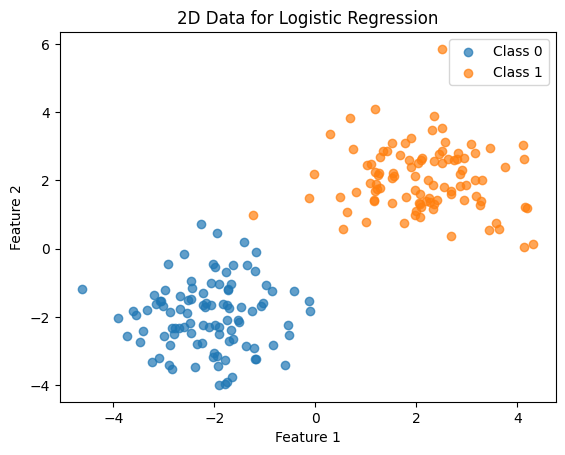

In [5]:
np.random.seed(42)
n_samples = 100
class0 = np.random.randn(n_samples, 2) + np.array([-2, -2])
class1 = np.random.randn(n_samples, 2) + np.array([2, 2])

X = np.vstack((class0, class1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

plt.scatter(X[y==0, 0], X[y==0, 1], label='Class 0', alpha=0.7)
plt.scatter(X[y==1, 0], X[y==1, 1], label='Class 1', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data for Logistic Regression')
plt.legend()
plt.show()


## Testing

In [6]:
d = X.shape[1]
w = np.random.randn(d+1)
LR = Logostic_Regression(w,X,y)
LR.prediction().shape,LR.slope(LR.X,LR.w,LR.y).shape

((200,), (3,))

### Batch Gradient Descent

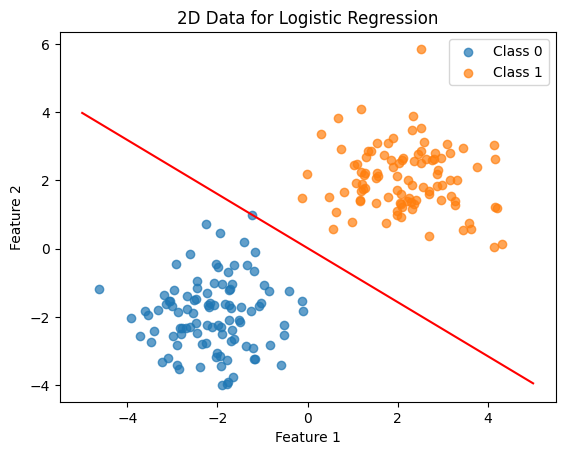

In [7]:
opt = Optimization(LR.slope)
batch_params = opt.batch_gradient_descent(LR.X,LR.y,LR.w,0.001)
prediction = LR.logistic(LR.X,batch_params)
plt.scatter(X[prediction==0, 0], X[prediction==0, 1], label='Class 0', alpha=0.7)
plt.scatter(X[prediction==1, 0], X[prediction==1, 1], label='Class 1', alpha=0.7)
plt.plot(np.linspace(-5,5,100),-(batch_params[0]+batch_params[1]*np.linspace(-5,5,100))/batch_params[2],'r-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data for Logistic Regression')
plt.legend()
plt.show()

### Mini Batch Gradient Descent

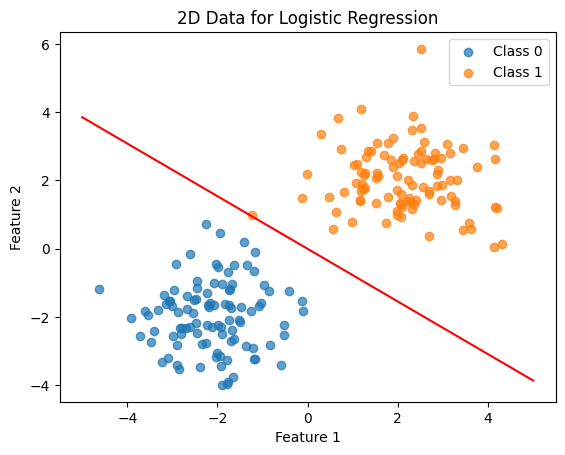

In [8]:
opt = Optimization(LR.slope)
mbatch_params = opt.mini_batch_gradient_descent(LR.X,LR.y,LR.w,0.001,10,tot_err = 1e-12)
prediction = LR.logistic(LR.X,mbatch_params)
plt.scatter(X[prediction==0, 0], X[prediction==0, 1], label='Class 0', alpha=0.7)
plt.scatter(X[prediction==1, 0], X[prediction==1, 1], label='Class 1', alpha=0.7)
plt.plot(np.linspace(-5,5,100),-(mbatch_params[0]+mbatch_params[1]*np.linspace(-5,5,100))/mbatch_params[2],'r-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data for Logistic Regression')
plt.legend()
plt.show()

### Stochastic Gradient Descent

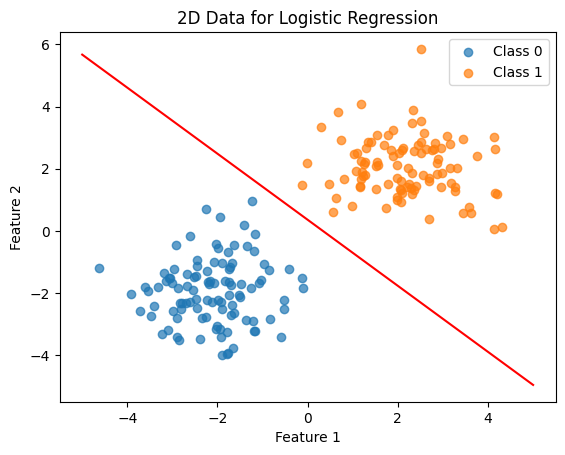

In [9]:
opt = Optimization(LR.slope)
sbatch_params = opt.stochastic_gradient_descent(LR.X,LR.y,LR.w,0.001,1,tot_err = 1e-12)
prediction = LR.logistic(LR.X,sbatch_params)
plt.scatter(X[prediction==0, 0], X[prediction==0, 1], label='Class 0', alpha=0.7)
plt.scatter(X[prediction==1, 0], X[prediction==1, 1], label='Class 1', alpha=0.7)
plt.plot(np.linspace(-5,5,100),-(sbatch_params[0]+sbatch_params[1]*np.linspace(-5,5,100))/sbatch_params[2],'r-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Data for Logistic Regression')
plt.legend()
plt.show()